In [2]:
# cargamos las liberías necesarias:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

In [3]:
#cagamos los archivo
datos_train= pd.read_parquet(r'Datasets/train.parquet')
datos_test= pd.read_parquet(r'Datasets/test.parquet')

In [4]:
#Evaluamos la estructura de la tabla
datos_train.head(2)


,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.225,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.780,co


In [42]:
#Analizamos los datos

datos_train.describe() # principales variables estadísticas
datos_train.info()

#vemos los tipos de variables que tenemos
datos_train.dtypes
#verificamos el numero de filas y columnas
datos_train.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

(346479, 22)

In [43]:
#verificamos los valores nulos
datos_train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

In [44]:
#eliminamos nulos
datos_test.dropna(inplace=True)
datos_test.isnull().sum()

id                         0
url                        0
region                     0
region_url                 0
type                       0
sqfeet                     0
beds                       0
baths                      0
cats_allowed               0
dogs_allowed               0
smoking_allowed            0
wheelchair_access          0
electric_vehicle_charge    0
comes_furnished            0
laundry_options            0
parking_options            0
image_url                  0
description                0
lat                        0
long                       0
state                      0
dtype: int64

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'price'}>,
        <AxesSubplot: title={'center': 'sqfeet'}>,
        <AxesSubplot: title={'center': 'beds'}>],
       [<AxesSubplot: title={'center': 'baths'}>,
        <AxesSubplot: title={'center': 'cats_allowed'}>,
        <AxesSubplot: title={'center': 'dogs_allowed'}>,
        <AxesSubplot: title={'center': 'smoking_allowed'}>],
       [<AxesSubplot: title={'center': 'wheelchair_access'}>,
        <AxesSubplot: title={'center': 'electric_vehicle_charge'}>,
        <AxesSubplot: title={'center': 'comes_furnished'}>,
        <AxesSubplot: title={'center': 'lat'}>],
       [<AxesSubplot: title={'center': 'long'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

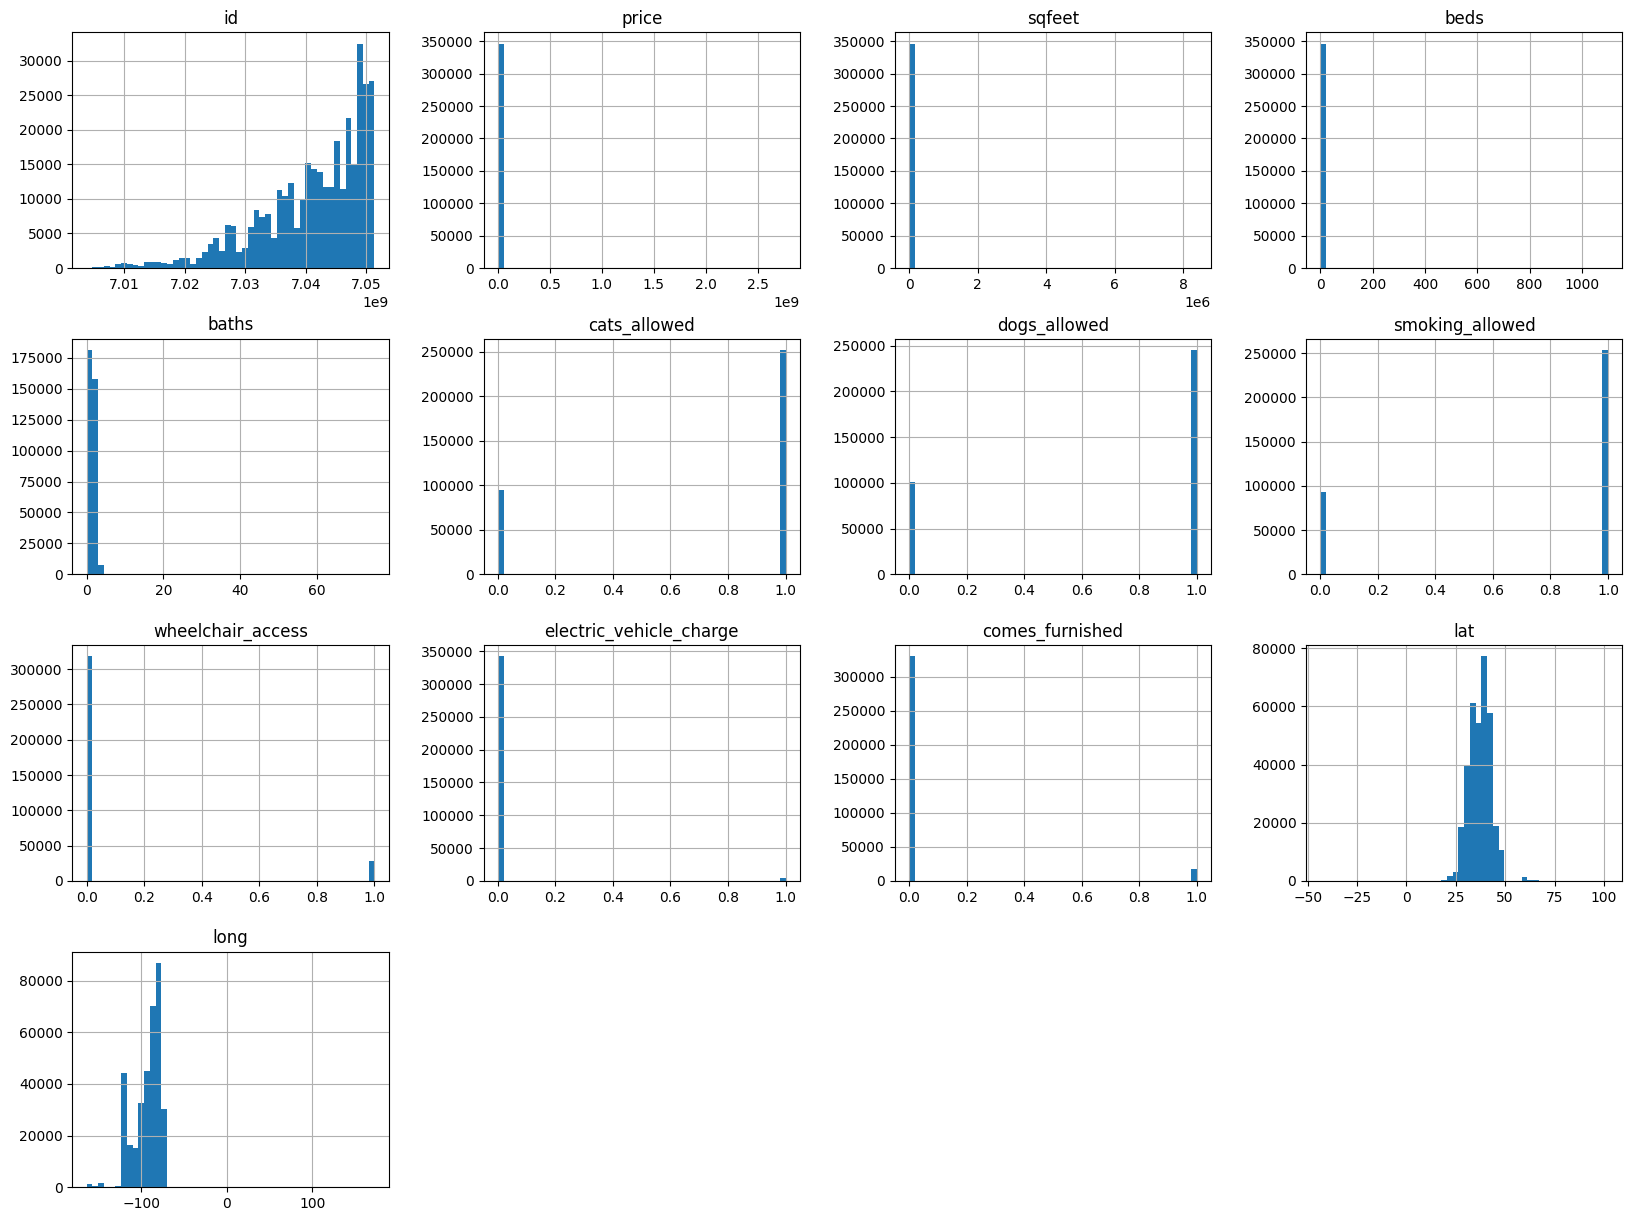

In [46]:
#graficamos variables numericas
datos_train.hist(bins=50, figsize=(20,15))

<AxesSubplot: xlabel='long', ylabel='lat'>

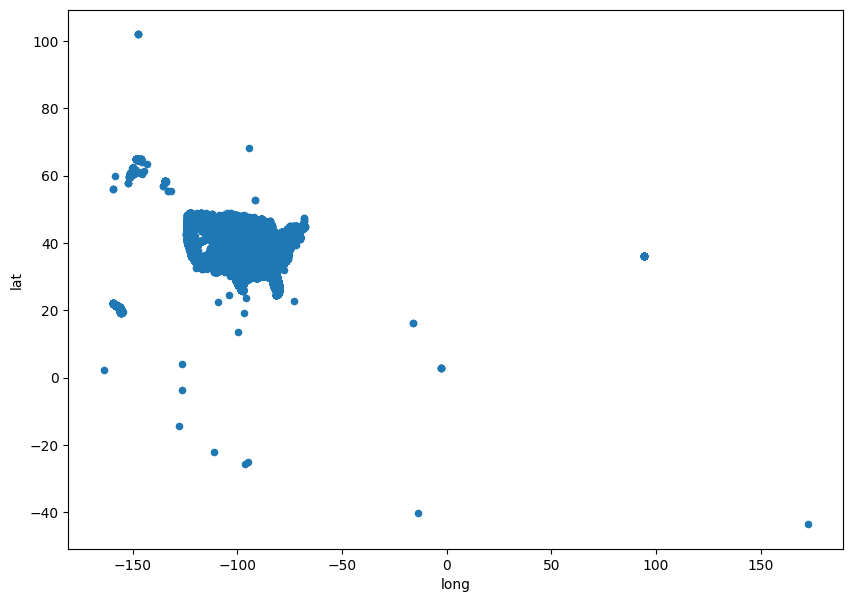

In [47]:
#vemos los puntos en el mapa
datos_train.plot(kind='scatter', x='long', y='lat', figsize=(10,7))

<AxesSubplot: xlabel='long', ylabel='lat'>

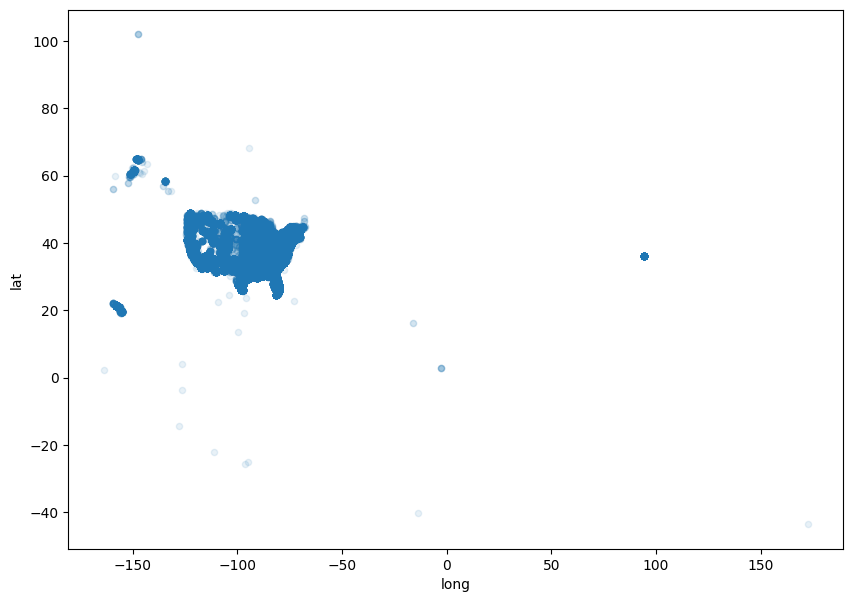

In [49]:
#Agregamos opción Alpha=0.1 para ver donde hay mayor densidad
datos_train.plot(kind='scatter', x='long',alpha=0.1, y='lat', figsize=(10,7))

In [ ]:
var_num=['price', 'sqfeet','beds','baths','smoking_allowed','laundry_options','parking_options','state','category_price']
scatter_matrix(datos_train[var_num], figsize=(12,8))

In [50]:
#transformamos los valores nulos

datos_train['laundry_options'].fillna('sin_dato', inplace=True)
datos_train['parking_options'].fillna('sin_dato', inplace=True)
datos_train['description'].fillna('sin_dato', inplace=True)
datos_train['lat'].fillna(0.00, inplace=True)
datos_train['long'].fillna(0.00, inplace=True)

In [51]:
# creamos columna category_price y sus especificaciones:1= Propiedades entre 0-999 y 0= propiedades mayores a 999
category_price = [(datos_train['price'] <= 999), (datos_train['price'] > 999)]
values = [1,0]
datos_train.insert(18, 'category_price', np.select(category_price,values))

In [52]:
#Hacemos una tabla para vericficar las correlaciones
datos_train.corr()

C:\Users\Mayra Pajaro\AppData\Local\Temp\ipykernel_15176\3581252733.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datos_train.corr()


,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,category_price,lat,long
id,1.000000,-0.001062,-0.005211,-0.020890,-0.036490,0.043673,0.035597,0.016282,0.007329,0.019418,-0.030653,-0.101539,-0.004710,-0.074063
price,-0.001062,1.000000,0.000008,0.000071,0.000156,0.001026,0.001044,0.001024,-0.000423,-0.000186,-0.000374,-0.001759,-0.001291,0.000709
sqfeet,-0.005211,0.000008,1.000000,0.004030,0.010611,-0.003808,-0.002791,-0.002164,-0.001234,-0.000150,0.001235,-0.005171,0.006237,-0.002696
beds,-0.020890,0.000071,0.004030,1.000000,0.378980,-0.024088,-0.013665,-0.001809,-0.012290,-0.005221,0.002834,-0.047671,0.005601,0.009694
baths,-0.036490,0.000156,0.010611,0.378980,1.000000,-0.019610,0.018844,-0.014784,0.019484,0.008324,0.039178,-0.227544,-0.079261,0.000807
cats_allowed,0.043673,0.001026,-0.003808,-0.024088,-0.019610,1.000000,0.887352,0.016858,0.122285,0.049270,-0.059488,0.009900,-0.009478,0.027014
dogs_allowed,0.035597,0.001044,-0.002791,-0.013665,0.018844,0.887352,1.000000,0.013732,0.129010,0.049180,-0.038191,0.003936,-0.048507,0.015376
smoking_allowed,0.016282,0.001024,-0.002164,-0.001809,-0.014784,0.016858,0.013732,1.000000,-0.223676,-0.096233,-0.161876,0.124547,-0.157188,0.149743
wheelchair_access,0.007329,-0.000423,-0.001234,-0.012290,0.019484,0.122285,0.129010,-0.223676,1.000000,0.192750,0.195553,-0.042573,0.005270,-0.026186
electric_vehicle_charge,0.019418,-0.000186,-0.000150,-0.005221,0.008324,0.049270,0.049180,-0.096233,0.192750,1.000000,0.069185,-0.066749,0.023587,-0.056914


In [53]:
# Hacemos Label Encoding para convertir los datos en formáto numérico y luego pueda ser leído por la máquina

label_enc = LabelEncoder()
datos_train['region'] =label_enc.fit_transform(datos_train['region'])
label_enc = LabelEncoder()
datos_train['parking_options'] =label_enc.fit_transform(datos_train['parking_options'])
label_enc = LabelEncoder()
datos_train['state'] =label_enc.fit_transform(datos_train['state'])
label_enc = LabelEncoder()
datos_train['laundry_options'] =label_enc.fit_transform(datos_train['laundry_options'])
label_enc = LabelEncoder()
datos_train['type'] =label_enc.fit_transform(datos_train['type'])


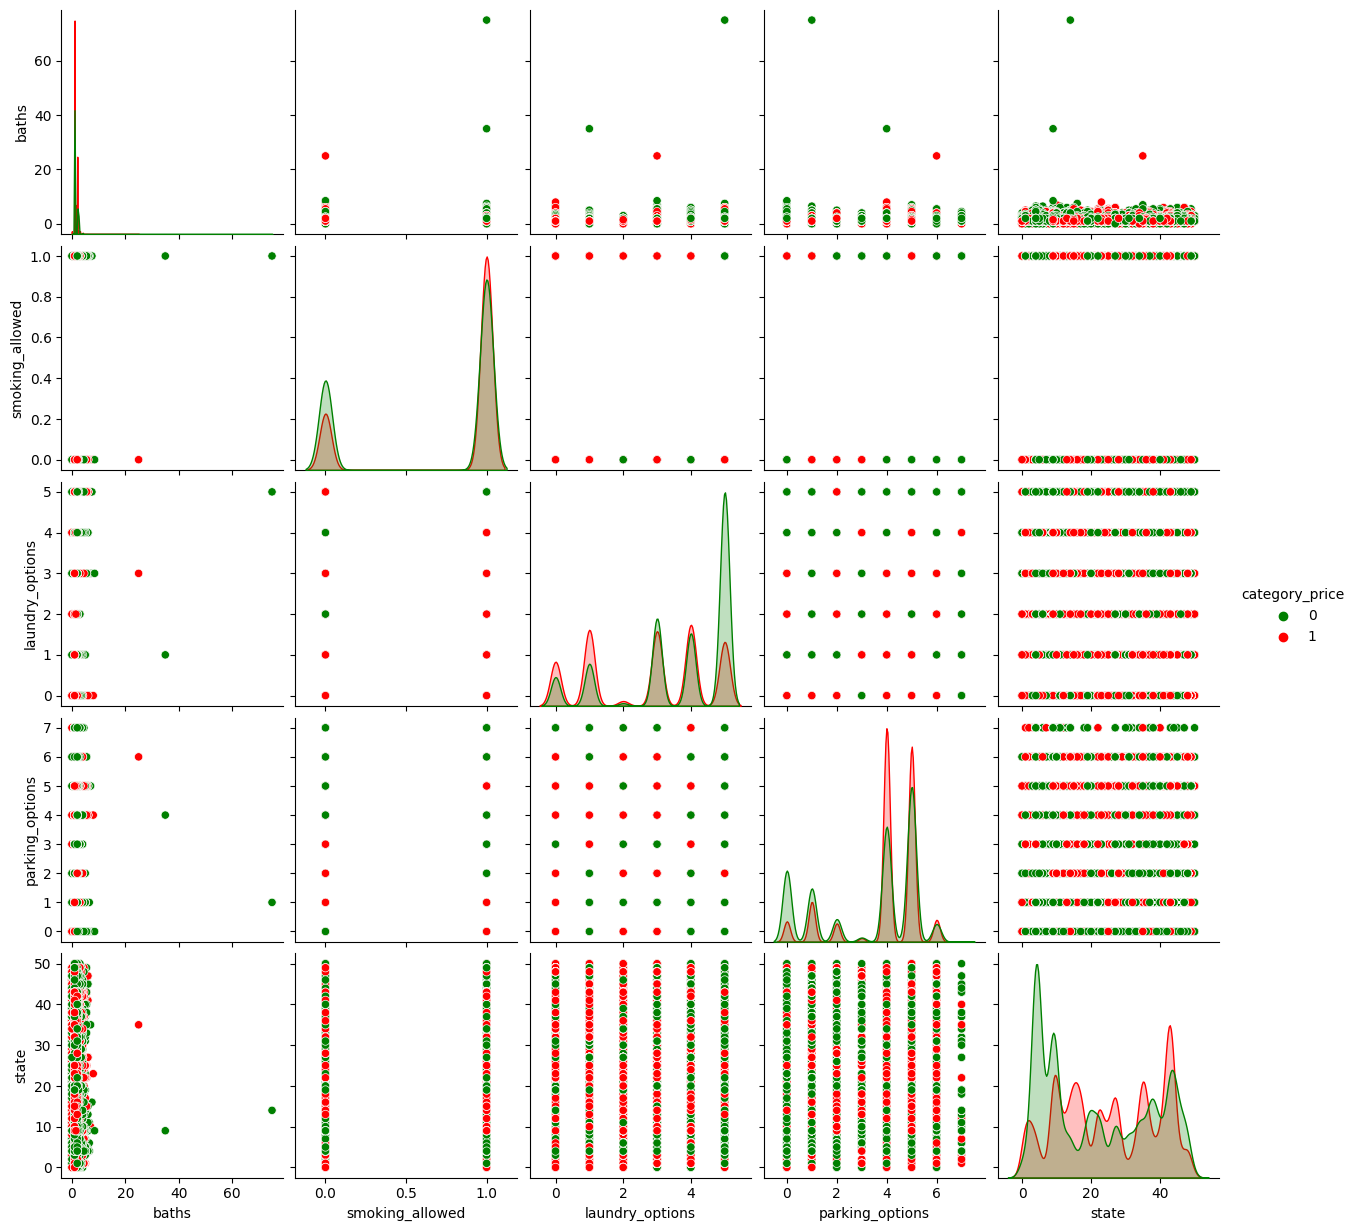

In [54]:
#graficamos las correlaciones
corr= datos_train[['baths','smoking_allowed','laundry_options','parking_options','state','category_price']]

sns.pairplot(corr, hue="category_price", palette = ['g', 'r'])
plt.show()

In [55]:
# Separar los datos en características y etiquetas
X = corr.drop('category_price', axis=1)
y = corr['category_price']

In [56]:
# Instanciamos el modelo de regresión logística
clf = LogisticRegression()

In [57]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

LogisticRegression()

In [59]:
#Predecimos
y_pred = clf.predict(X_test)

In [60]:
# Calculamos:
# precisión
acc = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc)

#recall
recall = recall_score(y_test, y_pred)
print("Recall: ", recall)

Accuracy:  0.6536163703532671
Recall:  0.6004868306079141


In [34]:
#Guardamos la predicción
prediccion = pd.DataFrame(y_pred, columns = ['predic'])

prediccion.to_csv('M4yr4.csv', index = False)